In [30]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sbn
import pandas as pd


In [31]:
# incelediğimiz veri seti telefonların isimleri, modelleri, markaları ve özelliklerinden bahsediyor.

In [95]:
data= pd.read_csv('ndtv_data_final.csv')

In [96]:
data.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

In [34]:
data.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [98]:
data.shape

(1359, 22)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

In [108]:
# pasta grafikleini çizdireceğimiz fonksiyonu oluşturuyorum
def pie_visualization(dataframe,column):
    dataframe[column].value_counts().plot.pie(legend=True,autopct="%1.2f%%")

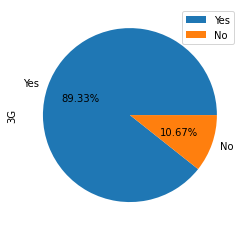

In [113]:

pie_visualization(data,"3G")
#Telefonların %89.33'ünde 3G bulunduğu %10.67'sinde bulunmadığı gösterilmiştir.

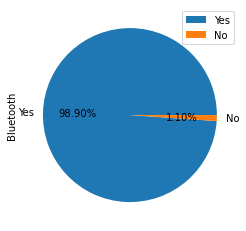

In [111]:
pie_visualization(data,"Bluetooth")
#Telefonların %98.90'ında Bluetooth bulunduğu %1.10 luk kısımda bulunmadığı gösterilmiştir.


In [106]:
#Kutu garfiğini çizdireceğimiz fonksiyonu oluşturalım.
def barplot(degisken,n=4):
    data1=data[degisken]
    data1sayi=data1.value_counts()
    data1sayi=data1sayi[:n]
    plt.figure()
    plt.bar(data1sayi.index, data1sayi, color="red")
    plt.xticks(data1sayi.index, data1sayi.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {} ".format(degisken))
    plt.show()
    print("{}: \n {} ".format(degisken, data1sayi))

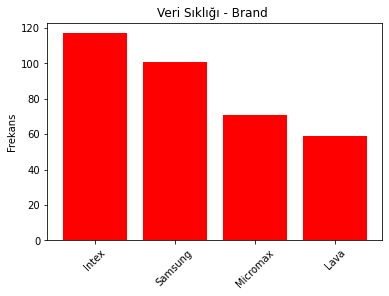

Brand: 
 Intex       117
Samsung     101
Micromax     71
Lava         59
Name: Brand, dtype: int64 


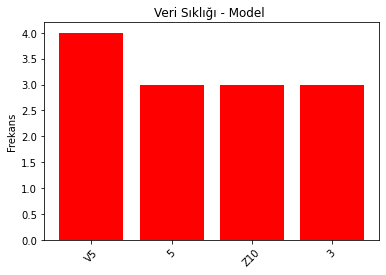

Model: 
 V5     4
5      3
Z10    3
3      3
Name: Model, dtype: int64 


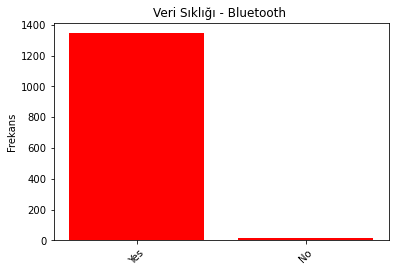

Bluetooth: 
 Yes    1344
No       15
Name: Bluetooth, dtype: int64 


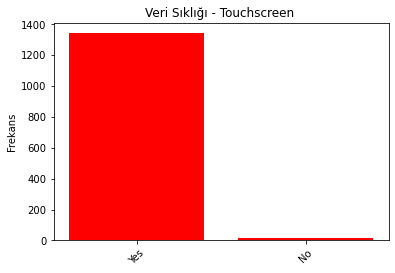

Touchscreen: 
 Yes    1342
No       17
Name: Touchscreen, dtype: int64 


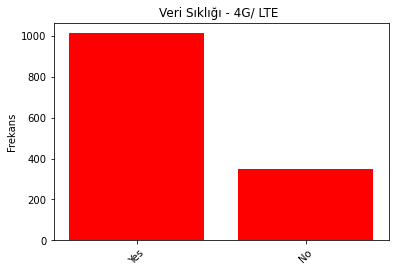

4G/ LTE: 
 Yes    1012
No      347
Name: 4G/ LTE, dtype: int64 


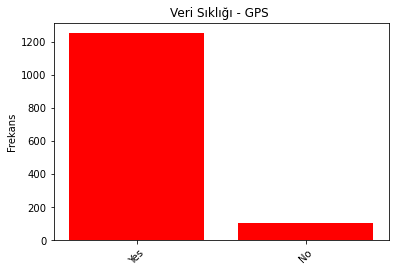

GPS: 
 Yes    1251
No      108
Name: GPS, dtype: int64 


In [59]:
kategorik_degisken = ["Brand","Model","Bluetooth","Touchscreen","4G/ LTE","GPS"]
for i in kategorik_degisken:
    barplot(i)

In [70]:
#Brand grafiğini inceleyecek olursak  
#Intex       117
#Samsung     101
#Micromax    71
#Lava        59

# Bluetooth grafiğini inceleyecek olursak
#Bluetooth olan     1344
#Bluetooth olmayan  15

#Touchscreen grafiğini inceleyecek olursak 
#Touchscreen olan     1342
#Touchscreen olmayan  17

#4G/ LTE grafiğini inceleyecek olursak
#4G/ LTE olan     1012
#4G/ LTE olmayan  347

#GPS grafiğini inceleyecek olursak
#GPS olan    1251
#GPS olmayan 108 tane telefon vardır.

<AxesSubplot:xlabel='RAM (MB)', ylabel='Price'>

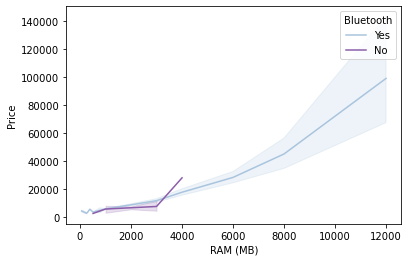

In [103]:
sbn.lineplot(data=data, x="RAM (MB)", y="Price", hue="Bluetooth", palette="BuPu")
# Ramı 4000 den fiyatı 30000 den yüksek telefonlarda Bluetooth vardır.

In [104]:
#histogram grafikleini çizdireceğimiz fonksiyonu oluşturuyorum.
def plotHistogram(degisken):

    plt.figure()
    plt.hist(data[degisken], bins=75, color = "red")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

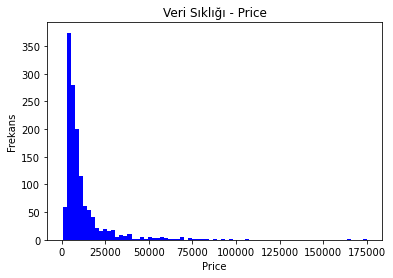

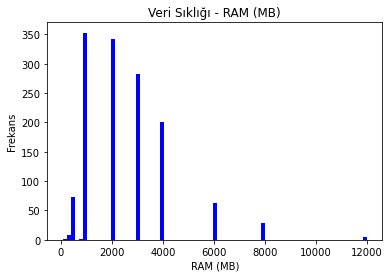

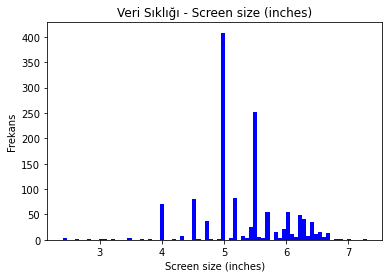

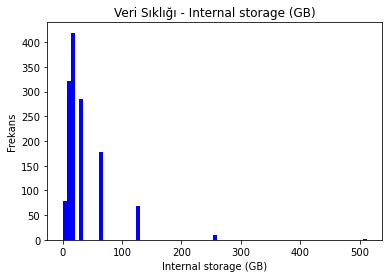

In [116]:
# tüm sayısal dğişkenler için histogramları çizdirelim
sayisal_degisken = ["Price", "RAM (MB)", "Screen size (inches)", "Internal storage (GB)"]
for i in sayisal_degisken:
    plotHistogram(i)

In [117]:
# Price grafiğine bakacak olursak en çok telefon 0 ve 25000 arasında vardır sonrasında fiyat arttıkça telefon sayısı azalmıştır.
# RAM(MB) grafiğine bakacak olursak en çok telefon 0 ve 2000 RAM(MB) arasında vardır. RAM arttıkça telefon sayısı azalmıştır.
# Screen size(inches) grafiğine bakacak olursak en çok telefon 5 ve 6 inch arasında vardır. 4 ten az   ve 7 inchten çok
# olan telefon yok denilebilecek kadar azdır. 
# Internal storage(GB) grafiğine bakacak olursak en çok telefon 0 ve 100 GB arasında vardır. 250 gb ve üstünde yok denilecek 
# kadar az telefon bulunmaktadır.

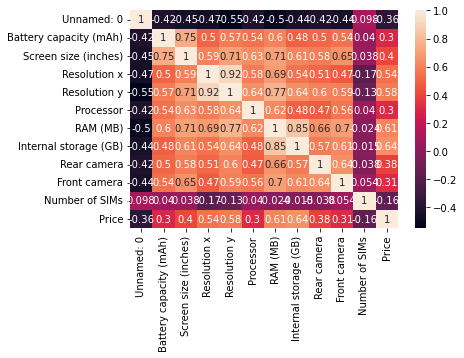

In [121]:
sbn.heatmap(data.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

In [122]:
# Number of SIMs ile diğer değişkenler arasında çok zayıf bir bağ vardır
# Name ile diğer değişkenler arasında çok zayıf bir bağ vardır.
# Resolution x ve Resolution y arasında çok güçlü bir bağ vardır.
# RAM ve Internal storage arasında güçlü bir bağ vardır.
# Price ile Internal storage arasında güçlü bir bağ vardır.


In [161]:
Touchscreen= data[data.Touchscreen =="Yes"]
Touchscreen.head(3)

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900


In [162]:
Bluetooth = data[data.Bluetooth=="Yes"]
Bluetooth.head(3)

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900


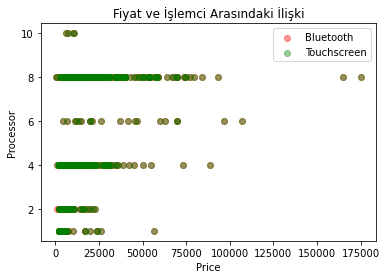

In [164]:
#Scatter Plot Grafiğini çizdiriyoruz.
plt.figure()
plt.scatter(Bluetooth.Price, Bluetooth.Processor, alpha =0.4, label= "Bluetooth", color="red")
plt.scatter(Touchscreen.Price, Touchscreen.Processor, alpha =0.4, label= "Touchscreen", color= "green")
plt.xlabel("Price")
plt.ylabel("Processor")
plt.title("Fiyat ve İşlemci Arasındaki İlişki")
plt.legend()
plt.show()

In [ ]:
# Buetooth ve Touchscreen 0 ve 25000 fiyat  aralığında fazladır.
# Processor 8 iken Buetooth ve Touchscreen fazladır.

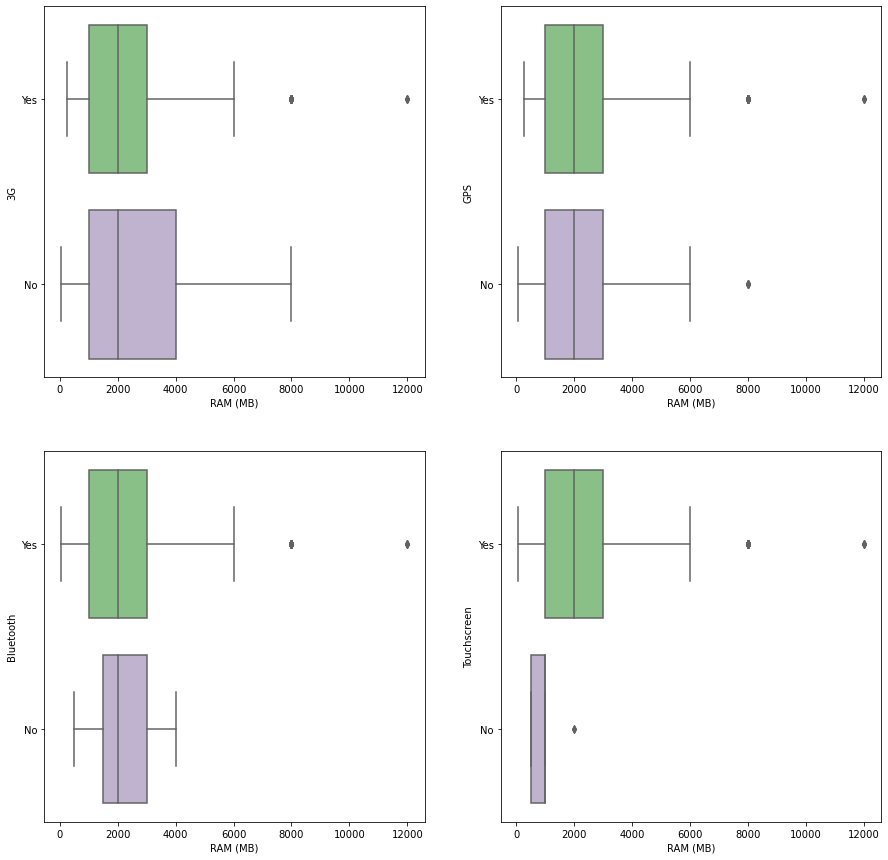

In [180]:

def graph(y):
    sbn.boxplot(x="RAM (MB)", y=y, data=data,
               palette="Accent")
  
plt.figure(figsize=(15,15))

plt.subplot(221)
graph('3G')

plt.subplot(222)
graph('GPS')
  
plt.subplot(223)
graph('Bluetooth')
  
plt.subplot(224)
graph('Touchscreen')
  
plt.show()

In [181]:
#RAM 1000 ile 3000 arasında 3G İçin fazladır. 6000 den sonra aykırı değerler vardır.Simetrik Normal
#RAM 1000 ile 3000 arasında GPS İçin fazladır. 6000 den sonra aykırı değerler vardır.Simetrik Normal
#RAM 1000 ile 3000 arasında Bluetooth için fazladır. 6000 den sonra aykırı değerler vardır.Simetrik Normal
#RAM 1000 İLE 3000 arasında Touchscreen için fazladır. 6000 den sonra ykırı değerler vardır.Simetrik Normal

<AxesSubplot:xlabel='Internal storage (GB)', ylabel='Price'>

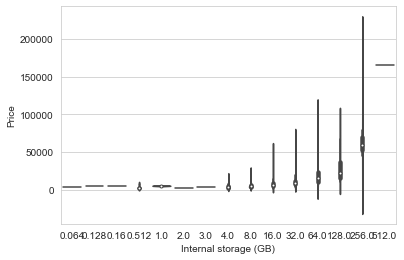

In [193]:
sbn.set_style('whitegrid')
sbn.violinplot(x = 'Internal storage (GB)', y = 'Price', data = data)

In [ ]:
#Internal Storage(GB) arttıkça Price artıyor.